**ANN**

In [16]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [17]:
#import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [18]:
dataset=pd.read_csv('/content/Churn_Modelling.csv')

In [19]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
## Divide the datset into dependent and independent daatset
X=dataset.iloc[:,6:13]
y=dataset.iloc[:,13]

In [21]:
X.head()

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,42,2,0.00,1,1,1,101348.88
1,41,1,83807.86,1,0,1,112542.58
2,42,8,159660.80,3,1,0,113931.57
3,39,1,0.00,2,0,0,93826.63
4,43,2,125510.82,1,1,1,79084.10


In [22]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
#now drop geography and Gender Column
X.drop(['Geography','Gender'],axis=1)  #axis=1 means that we need ro drop the column notbthe rows
#Now concatenate the dummy variables with dataframe
#X=pd.concat([X,geography,gender],axis=1)

In [25]:
print(X)

      Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0      42       2       0.00              1          1               1   
1      41       1   83807.86              1          0               1   
2      42       8  159660.80              3          1               0   
3      39       1       0.00              2          0               0   
4      43       2  125510.82              1          1               1   
...   ...     ...        ...            ...        ...             ...   
9995   39       5       0.00              2          1               0   
9996   35      10   57369.61              1          1               1   
9997   36       7       0.00              1          0               1   
9998   42       3   75075.31              2          1               0   
9999   28       4  130142.79              1          1               0   

      EstimatedSalary  
0           101348.88  
1           112542.58  
2           113931.57  
3            93

In [26]:
#Ques->For which algorithm is feature scaling required
#Splitting the daatset into training Set and tset set
from sklearn.model_selection import train_test_split
X_train,X_test,y_tarin,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


The StandardScaler is a technique used in machine learning and data preprocessing to standardize the features (i.e., columns) of a dataset. It is used to ensure that all features have the same scale, which can be important for many machine learning algorithms. Here are some reasons why StandardScaler is used:

**Mean Centering: **StandardScaler centers the data around zero by subtracting the mean of each feature. This ensures that each feature has a mean of zero, which can help in removing bias in the dataset.

**Scaling to Unit Variance: **After centering the data, StandardScaler scales each feature to have unit variance. This means that the variance of each feature is scaled to 1. This is important because features with larger variances can dominate the learning process, leading to biased results.

**Preserving Distribution Shape: **StandardScaler preserves the shape of the distribution of the original data while scaling it. It does not change the distribution's shape but only its location and scale.

**Improving Model Performance:** Many machine learning algorithms perform better or converge faster when features are scaled to a similar range. StandardScaler helps in achieving this by standardizing the features.

**Compatibility with Regularization: **Regularization techniques like Ridge and Lasso regression assume that all features are on the same scale. StandardScaler ensures that this assumption holds true, which can improve the effectiveness of regularization.

**Interpretability of Coefficients:** When interpreting the coefficients of linear models, it's easier if all features are on the same scale. StandardScaler facilitates this interpretation by ensuring that all features have similar ranges of values.

**Handling Outliers:** StandardScaler is less affected by outliers compared to other scaling techniques like Min-Max scaling. Since it scales data based on mean and variance, outliers have less impact on the scaling process.

In [27]:
#feature Scaling
#Ques->Why fit transform is applied earlier than transform
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [29]:
X_train

array([[-0.94449979, -0.70174202,  0.58817274, ..., -1.55337352,
         0.97725852,  0.42739449],
       [-0.94449979, -0.35520275,  0.46984886, ..., -1.55337352,
        -1.02327069, -1.02548708],
       [ 0.77498705,  0.33787579,  0.85878772, ...,  0.64376017,
         0.97725852, -0.94479772],
       ...,
       [ 0.58393295,  1.3774936 , -1.22599173, ...,  0.64376017,
         0.97725852, -0.14096853],
       [ 0.01077067,  1.03095433, -1.22599173, ...,  0.64376017,
         0.97725852,  0.01781218],
       [ 0.29735181,  0.33787579,  0.37995545, ...,  0.64376017,
        -1.02327069, -1.15822478]])

In [31]:
X_test

array([[ 0.77498705, -1.0482813 , -1.22599173, ...,  0.64376017,
         0.97725852, -0.05360571],
       [-0.46686456, -0.70174202,  1.07152411, ...,  0.64376017,
        -1.02327069, -0.58392685],
       [ 0.29735181, -1.0482813 , -1.22599173, ..., -1.55337352,
         0.97725852, -0.16685331],
       ...,
       [-0.46686456,  1.72403288, -1.22599173, ..., -1.55337352,
         0.97725852,  1.0669965 ],
       [-0.84897275, -1.0482813 ,  0.39363749, ...,  0.64376017,
         0.97725852,  1.13101314],
       [ 1.25262228,  1.3774936 ,  1.09403221, ...,  0.64376017,
         0.97725852, -0.88790165]])

In [30]:
X_train.shape

(8000, 7)

In [32]:
X_test.shape

(2000, 7)

In [33]:
#Part 2 now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

**SEQUENTIAL:** Used to do the forward and backward propagation.

**DENSE:**Used to create the neurons and hidden layer.

**ACTIVATION FUNCTION:**LeakyReLU,PReLU,ELU,ReLU

**DROPOUT:**prevent overfitting by deactivating the neuron during training

In [34]:
#Intialize ANN
classifier=Sequential()

In [73]:
#Adding the Input Layer
classifier.add(Dense(units=11,activation='relu'))
#Dropout some neurons at each level
classifier.add(Dropout(0.3))

In [74]:
#Adding first hidden layer
classifier.add(Dense(units=7,activation='relu'))#units=neurons
classifier.add(Dropout(0.2))

In [75]:
#Adding Second hidden layer
classifier.add(Dense(units=6,activation='relu'))#units=neurons

In [76]:
## Adiingb the output layer
classifier.add(Dense(units=1,activation='sigmoid'))#units=neurons

**Train the Neural Network**

In [77]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#By default adam uses his own learning rate

In [78]:
#We avn also provide our learning rate also
import tensorflow
tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [79]:
#Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [80]:
model_history=classifier.fit(X_train,y_tarin,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 7s 7ms/step - loss: 0.4764 - accuracy: 0.8252 - val_loss: 0.3730 - val_accuracy: 0.8417
Epoch 2/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4014 - accuracy: 0.8328 - val_loss: 0.3698 - val_accuracy: 0.8531
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3878 - accuracy: 0.8397 - val_loss: 0.3672 - val_accuracy: 0.8501
Epoch 4/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3793 - accuracy: 0.8464 - val_loss: 0.3602 - val_accuracy: 0.8557
Epoch 5/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3791 - accuracy: 0.8442 - val_loss: 0.3619 - val_accuracy: 0.8561
Epoch 6/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3757 - accuracy: 0.8453 - val_loss: 0.3636 - val_accuracy: 0.8546
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3723 - accuracy: 0.8461 - val_loss: 0.3729 - val_accuracy:

In [81]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Exception ignored in: <function _xla_gc_callback at 0x7f627aa131c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


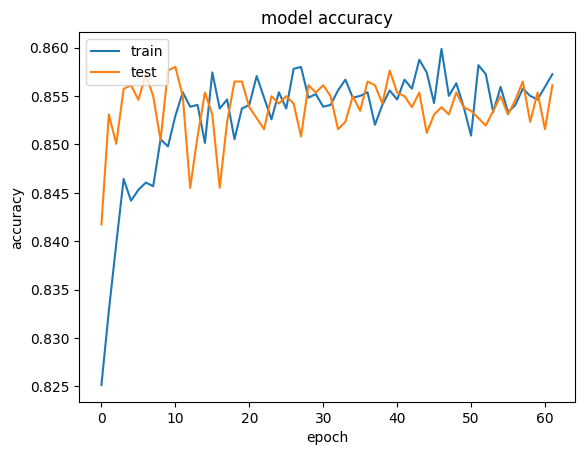

In [82]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

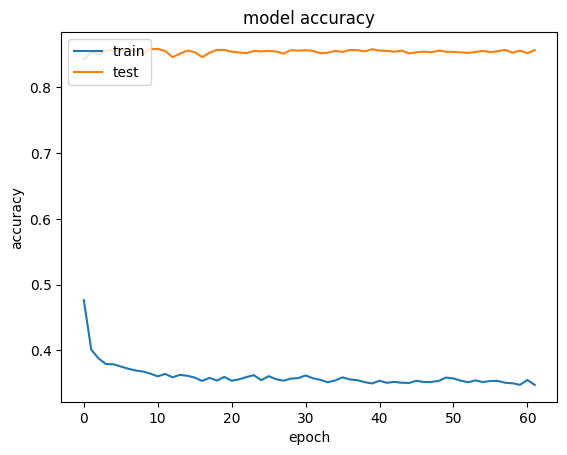

In [83]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [84]:
#PArt 3-> making Predictions and evaluating the model
#predicting thetest set results
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 2ms/step


In [85]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(y_test,y_pred)
cn

array([[1544,   41],
       [ 255,  160]])

In [86]:
#Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.852

In [87]:
#Get the weights
classifier.get_weights()

[array([[ 0.9560098 ,  1.0317646 , -0.42331198, -0.69530654,  0.09786156,
          0.6206228 , -0.08604966, -0.826447  ,  0.69086766, -0.9933765 ,
         -0.47533724],
        [ 0.3007285 ,  0.11277745, -0.04893401, -0.05736993,  0.16971481,
          0.02246483,  0.23682463, -0.06500123,  0.26856348, -0.16388851,
         -0.02606395],
        [-0.19259368, -0.30058149,  0.23689932, -0.28407213,  0.4634318 ,
         -0.5396503 , -0.20206483, -0.51797515,  0.2886462 ,  0.18918762,
         -0.12126122],
        [ 0.22051501,  0.6563652 ,  1.1985198 ,  0.13688381,  0.31384176,
         -0.9911052 , -0.24462722,  0.28846458,  0.55815643, -0.1816903 ,
          0.9064792 ],
        [-0.19185601,  0.3241022 , -0.3109245 , -0.5023897 , -0.79495764,
         -0.35124132,  0.5871316 , -0.13131098,  0.06445396,  0.5484371 ,
          0.63552976],
        [ 1.2649198 , -0.96267366,  0.23305884, -0.0232866 , -0.12064261,
          0.0710677 ,  0.269362  ,  0.7377555 ,  0.03216255,  0.878658 